In [2]:
%load_ext autoreload

# JointFitting

## 1D models
### Fitting model to single data set
Example showing how a model from a astropy.modeling can be fitted to a single data set.

Initial parameters:
slope 1.0 step= 0.1 
intercept 0.0 step= 0.1 


FCN = 7.57046392814 
 TOTAL NCALL = 32 
 NCALLS = 32 
 
 
 EDM = 2.94570839587e-22 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,slope,4.95708,0.110096,0,0,,,
2,intercept,3.27957,0.587754,0,0,,,


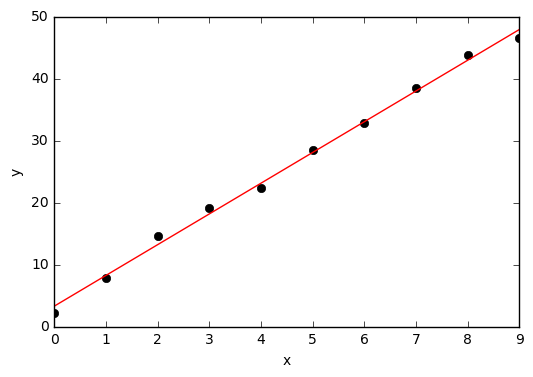

In [4]:
%aimport jointfitting
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models

# some fake data
m,k = 3.,5.
x1 = np.arange(10)
y1 = k*x1 + m
y1 += np.random.randn(len(x1))

# linear model from astropy.modeling
l1 = models.Linear1D()

# fitter
jf = jointfitting.JointMinuitFitter(verbose=True)
fitl = jf(l1,x1,y1)

# plot data and best fit
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1,y1,'ko')
xx = np.linspace(x1.min(),x1.max(),300)
ax.plot(xx,fitl(xx),'r-')
ax.set_xlabel('x'); ax.set_ylabel('y')
plt.show();
plt.close();

### Fitting model to two data sets
Fitting the same model to two data sets with the same slope but with different intercepts.

-10 10
Initial parameters:
slope 1.0 step= 0.1 
intercept_0 0.0 step= 0.1 
intercept_1 0.0 step= 0.1 


FCN = 2406.25 
 TOTAL NCALL = 36 
 NCALLS = 36 
 
 
 EDM = 7.68508785641e-15 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,intercept_0,3,0.218218,0,0,,,
2,intercept_1,9,0.218218,0,0,,,
3,slope,6.25,0.0254824,0,0,,,


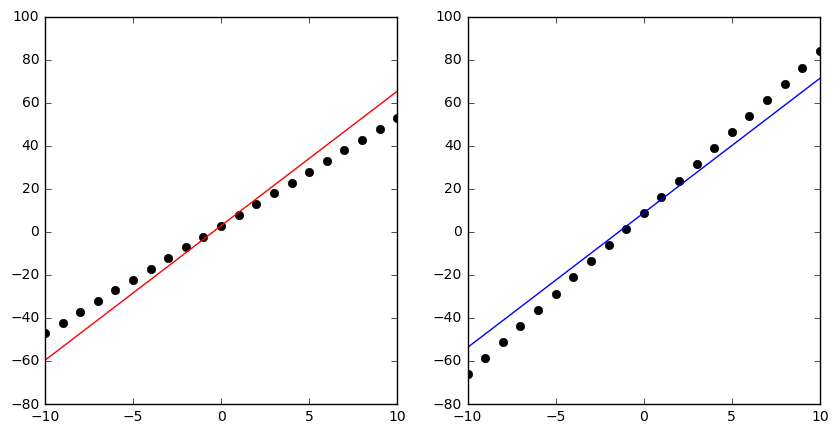

In [19]:
%aimport jointfitting


# some fake data
m1,k1 = 3.,5.
x1 = np.arange(-10,11)
print x1.min(),x1.max()
y1 = k1*x1 + m1

common_names = ['slope']
m2,k2 = m1*m1,1.5*k1
y2  = k2*x1 + m2

# data
xx = np.vstack((x1,x1))
yy = np.vstack((y1,y2))

# linear model from astropy.modeling
l1 = models.Linear1D()
l2 = models.Linear1D()

# fitter
jf = jointfitting.JointMinuitFitter(verbose=True)

fitl = jf([l1,l2],xx,yy,common_names=common_names)

xxx = np.linspace(x1.min(),x1.max(),300)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,sharey=ax1)
ax1.plot(x1,y1,'ko')
ax1.plot(xxx,fitl[0](xxx),'r-')
ax2.plot(x1,y2,'ko')
plt.plot(xxx,fitl[1](xxx),'b-')
plt.show()
plt.close()

## 2D fit single model two images
Fit two 2D Gaussians with the same sigma, but different positions and fluxes.

Initial parameters:
amplitude_0 5.0 step= 0.5 
x_mean_0 40.0 step= 4.0 
y_mean_0 40.0 step= 4.0 
x_stddev 5.0 step= 0.5 
y_stddev 5.0 step= 0.5 
theta 0.0 step= 0.1 
amplitude_1 3.0 step= 0.3 
x_mean_1 100.0 step= 10.0 
y_mean_1 100.0 step= 10.0 


FCN = 2.52607567589 
 TOTAL NCALL = 283 
 NCALLS = 283 
 
 
 EDM = 7.21579180458e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,amplitude_0,4.9321,0.146757,0,0,,,
2,x_mean_0,40,0.161803,0,0,,,
3,y_mean_0,40,0.159606,0,0,,,
4,amplitude_1,3.10074,0.125218,0,0,,,
5,x_mean_1,100,0.270199,0,0,,,
6,y_mean_1,100,0.253876,0,0,,,
7,x_stddev,4.99999,0.135125,0,0,,,
8,y_stddev,5.13672,0.139077,0,0,,,
9,theta,-1.57072,0.708269,0,0,,,


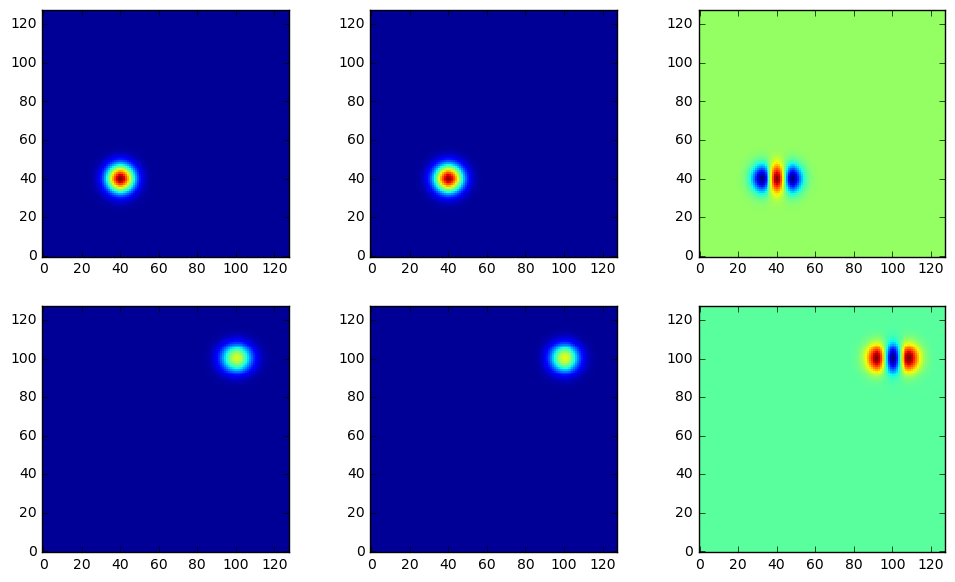

In [23]:
%aimport jointfitting
from astropy.modeling import models
import matplotlib.pyplot as plt

nx,ny = 128,128

common_names = ['x_stddev','y_stddev','theta']

# Generate fake data
np.random.seed(0)
y, x = np.mgrid[:nx, :ny]

z1,z2 = x*0.0,x*0.0

#z1 += np.random.randn(nx,ny)
#z2 += np.random.randn(nx,ny)

# models
g1 = models.Gaussian2D(amplitude=5.,x_mean=40,y_mean=40,x_stddev=5,y_stddev=5)
g2 = models.Gaussian2D(amplitude=3.,x_mean=100,y_mean=100,x_stddev=1.1*5,y_stddev=5) # slightly different x-sigma

z1 += g1(x,y)
z2 += g2(x,y)

# fitter
jf = jointfitting.JointMinuitFitter(verbose=True)

xx = np.stack((x,x),axis=0)
yy = np.stack((y,y),axis=0)
zz = np.stack((z1,z2),axis=0)

fitl = jf([g1,g2],xx,yy,zz,maxiter=50000,common_names=common_names)

vmin,vmax = -0.1,5
fig = plt.figure(figsize=(12,7))
for n in range(2):
    axd = fig.add_subplot(2,3,n*3+1)
    axm = fig.add_subplot(2,3,n*3+2)
    axr = fig.add_subplot(2,3,n*3+3)
    z = zz[n,:]
    axd.imshow(z,origin='lower',interpolation='nearest',vmin=vmin,vmax=vmax)
    m = fitl[n](x,y)
    axm.imshow(m,origin='lower',interpolation='nearest',vmin=vmin,vmax=vmax)
    axr.imshow(z-m,origin='lower',interpolation='nearest')
plt.show()
plt.close()

## The cost function with custom defined functions
The procudure below can be implemented directly in iminuit, which would be more straight-forward than what is done here.  The intention here is rather to show how this class can be used with custom functions. 

The const function is implemented as general class, JointCostFunctor, following the example from <a href='http://nbviewer.jupyter.org/github/iminuit/iminuit/blob/master/tutorial/tutorial.ipynb'>the iminuit tutorial</a>.

['m', 'c']
['a', 'b', 'c']


FCN = 350.0 
 TOTAL NCALL = 32 
 NCALLS = 32 
 
 
 EDM = 1.77105551473e-20 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,m,33,0.316228,0,0,,,
2,c,-32,1.04881,0,0,,,


{'c': -32.00000000001421, 'm': 32.999999999995005}


FCN = 3.43182107903e-18 
 TOTAL NCALL = 59 
 NCALLS = 59 
 
 
 EDM = 3.43188185273e-18 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,a,5,0.267261,0,0,,,
2,b,3,1.63445,0,0,,,
3,c,3,2.14476,0,0,,,


{'a': 5.000000000046059, 'c': 2.9999999997949764, 'b': 3.0000000001067813}


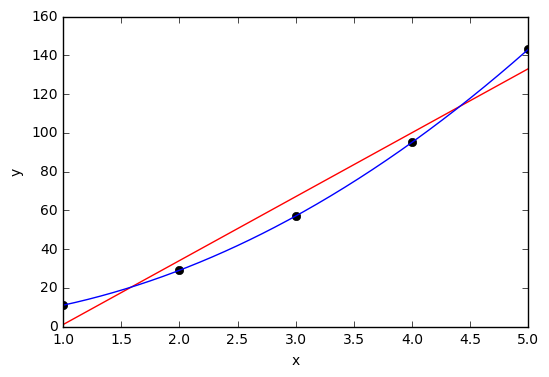

In [10]:
from jointfitting.cost import JointCostFunctor
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.util import describe

def linear(x,m,c) :
    """
    Linear hypothesis
    """
    return m*x + c

def parabola(x,a,b,c):
    """
    Parabolic hypothesis
    """
    return a*x**2 + b*x + c

# data
x = np.array([1,2,3,4,5])
y = 3 + x*3 + x*x*5

# plot data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y,'ko')

# setup minuit function
test1 = JointCostFunctor(linear,x,y)
print describe(test1)
test2 = JointCostFunctor(parabola,x,y)
print describe(test2)

# setup minuit object and minimize
m = Minuit(test1)
m.migrad()
print(m.values)

# plot fits
xx = np.linspace(x.min(),x.max(),300)
ax.plot(xx,linear(xx,m.values['m'],m.values['c']),'r-')

m = Minuit(test2)
m.migrad()
print(m.values)

ax.plot(xx,parabola(xx,m.values['a'],m.values['b'],m.values['c']),'b-')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()
plt.close()

### astropy.modeling
Same example as above but instead of manually defining functions we use models from astropy.modeling.

['slope', 'intercept']
['c0', 'c1', 'c2']


FCN = 350.0 
 TOTAL NCALL = 32 
 NCALLS = 32 
 
 
 EDM = 1.77105551473e-20 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,slope,33,0.316228,0,0,,,
2,intercept,-32,1.04881,0,0,,,


{'slope': 32.999999999995005, 'intercept': -32.00000000001421}


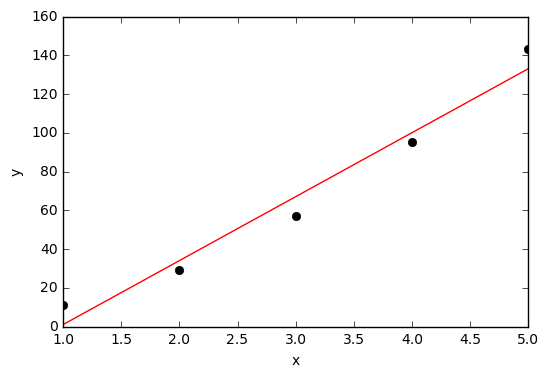

In [12]:
from jointfitting.cost import JointCostFunctor
from astropy.modeling import models

l = models.Linear1D()
p = models.Polynomial1D(2,{'a':0,'b':0,'c':0})
p.prepare_inputs(x)

# plot data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y,'ko')

# setup minuit function
test1 = JointCostFunctor(l.evaluate,x,y)
print describe(test1)

## I have not managed to figure out how to set the
## function signature for iminuit for models that
## set their parameter list dynamically
test2 = JointCostFunctor(p.evaluate,x,y,param_names=['c0','c1','c2'])
print describe(test2)

# setup minuit object and minimize
m1 = Minuit(test1)
m1.migrad()
print(m1.values)

# plot fits
for k in l.param_names:
    l.parameters[l.param_names.index(k)] = m1.values[k]
ax.plot(xx,l(xx),'r-')

m2 = Minuit(test2,c0=0.0,c1=0.0,c2=0.0)
#m2.migrad()
#print(m2.values)
# plot fits
#for k in p.param_names:
#    p.parameters[p.param_names.index(k)] = m2.values[k]
#ax.plot(xx,p(xx),'r-')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()
plt.close()